In [27]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,LassoLars,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error ,r2_score
import os

In [28]:
df=pd.read_csv('../data/zomato.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089
...,...,...,...,...,...,...,...
626,2024-02-01,141.000000,143.500000,138.550003,140.550003,140.550003,70252449
627,2024-02-02,141.800003,145.000000,141.449997,143.800003,143.800003,78666454
628,2024-02-05,145.000000,145.399994,138.250000,140.250000,140.250000,54189688
629,2024-02-06,140.399994,141.800003,138.050003,139.949997,139.949997,46782951


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       631 non-null    object 
 1   Open       631 non-null    float64
 2   High       631 non-null    float64
 3   Low        631 non-null    float64
 4   Close      631 non-null    float64
 5   Adj Close  631 non-null    float64
 6   Volume     631 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 34.6+ KB


In [30]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,631.000000,631.000000,631.000000,631.000000,631.000000,6.310000e+02
mean,90.011252,91.835737,87.868304,89.707686,89.707686,6.731737e+07
std,32.757639,33.319545,31.900849,32.621900,32.621900,7.461030e+07
min,40.849998,44.400002,40.599998,41.650002,41.650002,0.000000e+00
25%,62.549999,63.450001,61.125000,62.074998,62.074998,2.800788e+07
50%,80.000000,81.000000,78.099998,79.699997,79.699997,4.759710e+07
75%,124.474998,126.750000,121.525002,124.599998,124.599998,7.525439e+07
max,161.149994,169.000000,154.250000,160.300003,160.300003,6.948953e+08


In [42]:
df['Datetime'] = pd.to_datetime(df['Date'])
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month
df['Year'] = df['Datetime'].dt.year
df=df.drop('Date',axis=1)
df=df.drop('Adj Close',axis=1)
df=df.drop('Datetime',axis=1)
df

,Open,High,Low,Close,Volume,Day,Month,Year
0,116.000000,138.899994,115.000000,126.000000,694895290,23,7,2021
1,126.349998,143.750000,125.300003,140.649994,249723854,26,7,2021
2,141.699997,147.800003,127.750000,132.899994,240341900,27,7,2021
3,131.000000,135.000000,123.550003,131.199997,159793731,28,7,2021
4,134.949997,144.000000,132.199997,141.550003,117973089,29,7,2021
...,...,...,...,...,...,...,...,...
626,141.000000,143.500000,138.550003,140.550003,70252449,1,2,2024
627,141.800003,145.000000,141.449997,143.800003,78666454,2,2,2024
628,145.000000,145.399994,138.250000,140.250000,54189688,5,2,2024
629,140.399994,141.800003,138.050003,139.949997,46782951,6,2,2024


<Axes: xlabel='Year', ylabel='Open'>

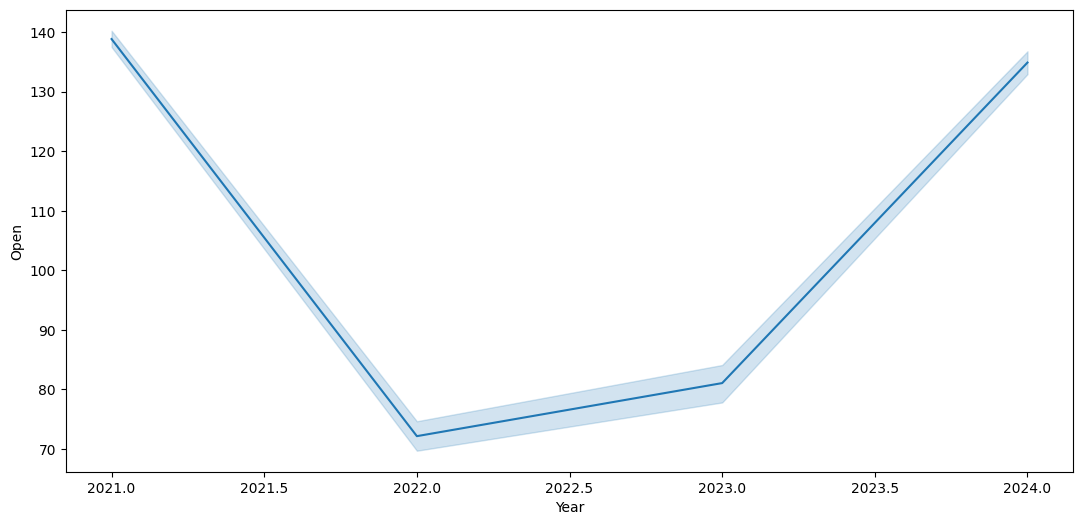

In [43]:
# df['Open'].plot(figsize=(12,5))

plt.figure(figsize=(13,6))
sns.lineplot(y=df['Open'],x=df['Year'])

In [ ]:
sns.lineplot(y=df[''],x=df['Year'])

In [6]:

X=df.drop('Close',axis=1)
y=df['Close']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
models = {
    'LinearRegression': LinearRegression(),
    'LassoLars': LassoLars(0.0001),
    'Ridge': Ridge(0.0001),
    'ElasticNet': ElasticNet(alpha=0.0001, l1_ratio=0.001),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=400, criterion='absolute_error', max_depth=100),
    'GradientBoostingRegressor': GradientBoostingRegressor(loss='absolute_error', learning_rate=0.05, n_estimators=100, random_state=0),
    'SVR': SVR(kernel="linear", gamma="scale", C=1),
    'DecisionTreeRegressor': DecisionTreeRegressor()
}

In [10]:
# Lists to store the results
model_list = []
r2_scores = []
mae_scores = []

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    r2 = r2_score(y_test, predictions)  # r2_score function
    mae = mean_absolute_error(y_test, predictions)

    model_list.append(model_name)
    r2_scores.append(r2)
    mae_scores.append(mae)


/Users/akashmukherjee/Programming/Practise ML/zomato stock price/my_env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.260e+02, tolerance: 5.278e+01
  model = cd_fast.enet_coordinate_descent(


In [11]:
# Display the results
for i in range(len(model_list)):
    print(f"Model: {model_list[i]}, R2 Score: {r2_scores[i]:.4f}, MAE: {mae_scores[i]:.4f}")

Model: LinearRegression, R2 Score: 0.9983, MAE: 0.8121
Model: LassoLars, R2 Score: 0.9983, MAE: 0.8130
Model: Ridge, R2 Score: 0.9983, MAE: 0.8122
Model: ElasticNet, R2 Score: 0.9985, MAE: 0.8194
Model: RandomForestRegressor, R2 Score: 0.9967, MAE: 1.2107
Model: GradientBoostingRegressor, R2 Score: 0.9920, MAE: 1.5500
Model: SVR, R2 Score: 0.9971, MAE: 1.2169
Model: DecisionTreeRegressor, R2 Score: 0.9929, MAE: 1.6055


In [12]:
pd.DataFrame(list(zip(model_list, r2_scores)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,ElasticNet,0.998454
0,LinearRegression,0.998349
2,Ridge,0.998349
1,LassoLars,0.998349
6,SVR,0.997107
4,RandomForestRegressor,0.996692
7,DecisionTreeRegressor,0.992914
5,GradientBoostingRegressor,0.991975


In [13]:
model=LinearRegression()
model.fit(X_train_scaled,y_train)
preditions=model.predict(X_test_scaled)
r2_score(y_test,preditions)

0.9983489381505594

In [14]:
os.makedirs('../models',exist_ok=True)

In [15]:
joblib.dump(model,'../models/model.joblib')

['../models/model.joblib']